In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
import time

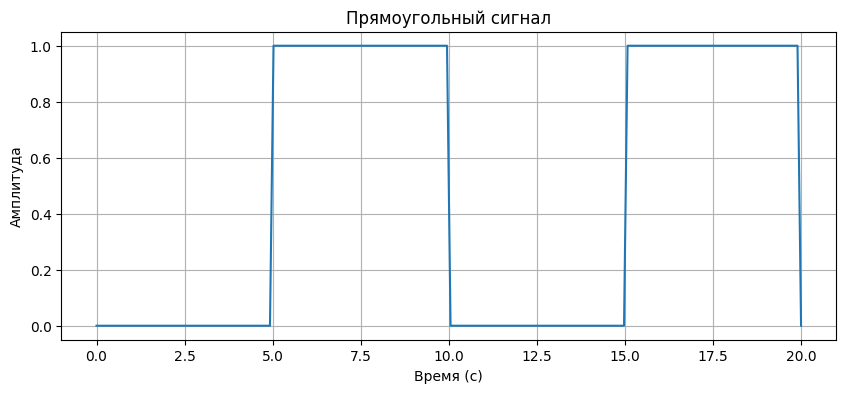

In [ ]:
amplitude = 1
period = 5
duration = 20
sampling_rate = 10

t = np.linspace(0, duration, int(duration * sampling_rate))

signal = np.array([(amplitude if time % (period * 2) >= period else 0) for time in t])

# Построение графика
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Прямоугольный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

1) На вход передатчика подается некоторый сигнал во времени. В качестве сигнала
возможно рассмотреть сигнал прямоугольных периодических импульсов.

Реализовать свертку сигнала с некоторым ядром во временной области.

В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.

Замечание: Для реализации свертки можно использовать готовую встроенную
функцию numpy: convolve(signal,kernel)

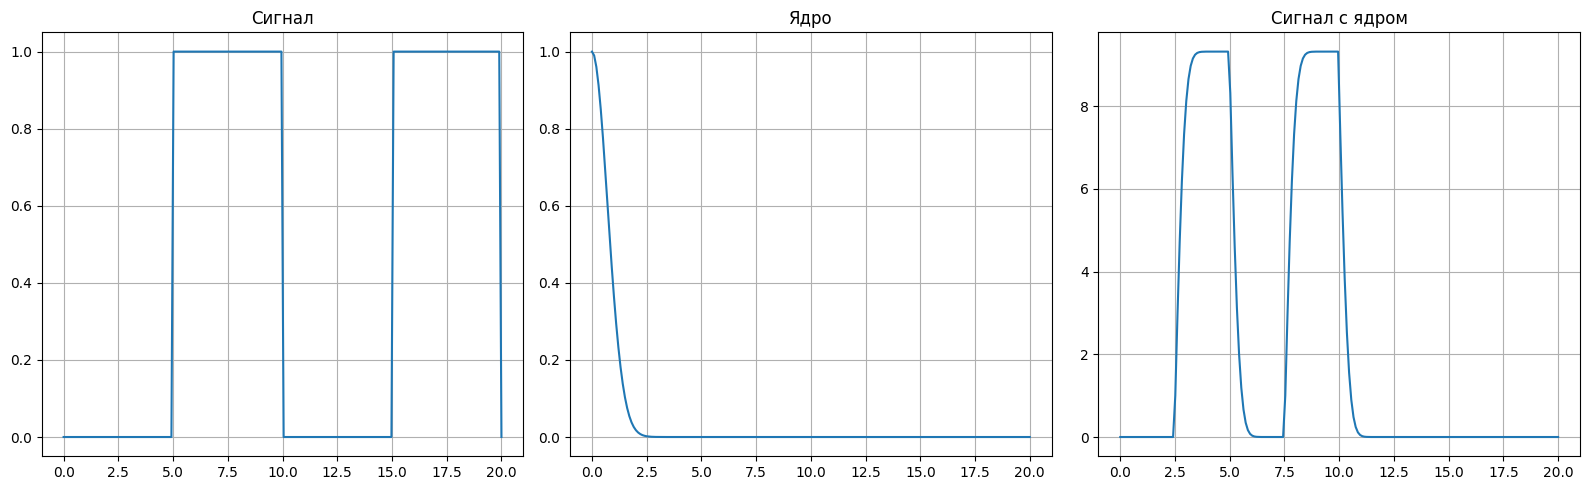

In [ ]:
#А)
kernel = amplitude * np.exp(-t**2)
signal_with_kernel = np.convolve(signal, kernel)[::2]

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title('Сигнал')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, kernel)
plt.title('Ядро')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t, signal_with_kernel)
plt.title('Сигнал с ядром')
plt.grid(True)
plt.tight_layout()
plt.show()

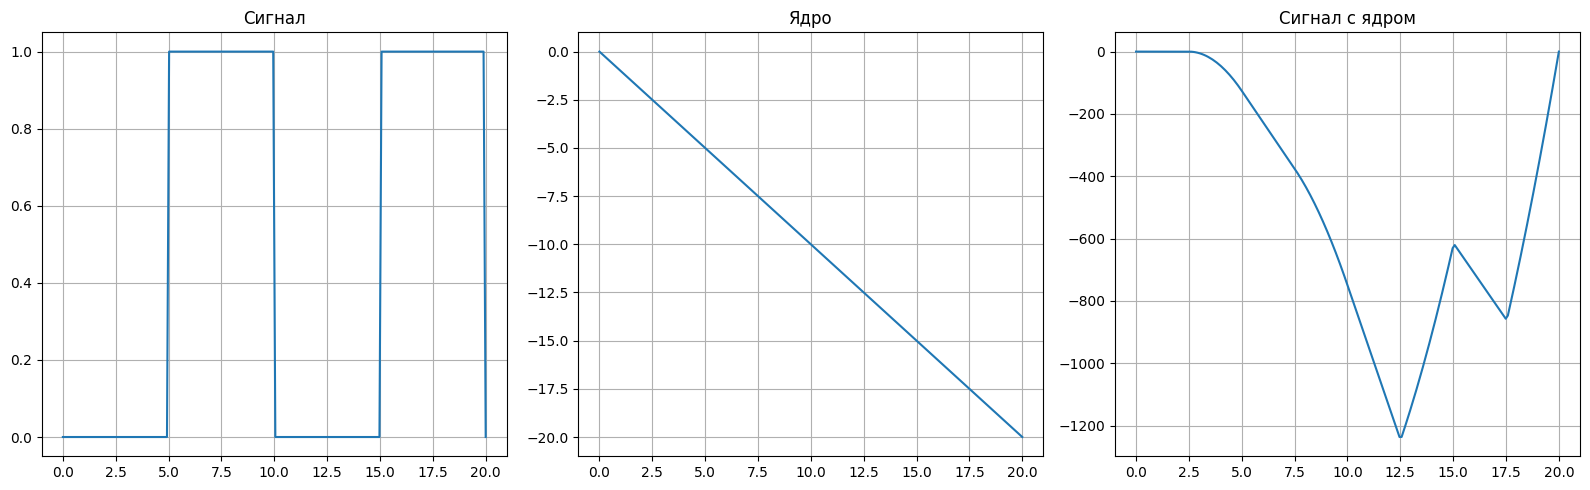

In [ ]:
#Б)

kernel = np.array([-x for x in t])
signal_with_kernel = np.convolve(signal, kernel)[::2]

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title('Сигнал')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, kernel)
plt.title('Ядро')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t, signal_with_kernel)
plt.title('Сигнал с ядром')
plt.grid(True)
plt.tight_layout()
plt.show()

2) Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой алгоритм,
осуществляющий свертку сигнала с произвольным ядром.

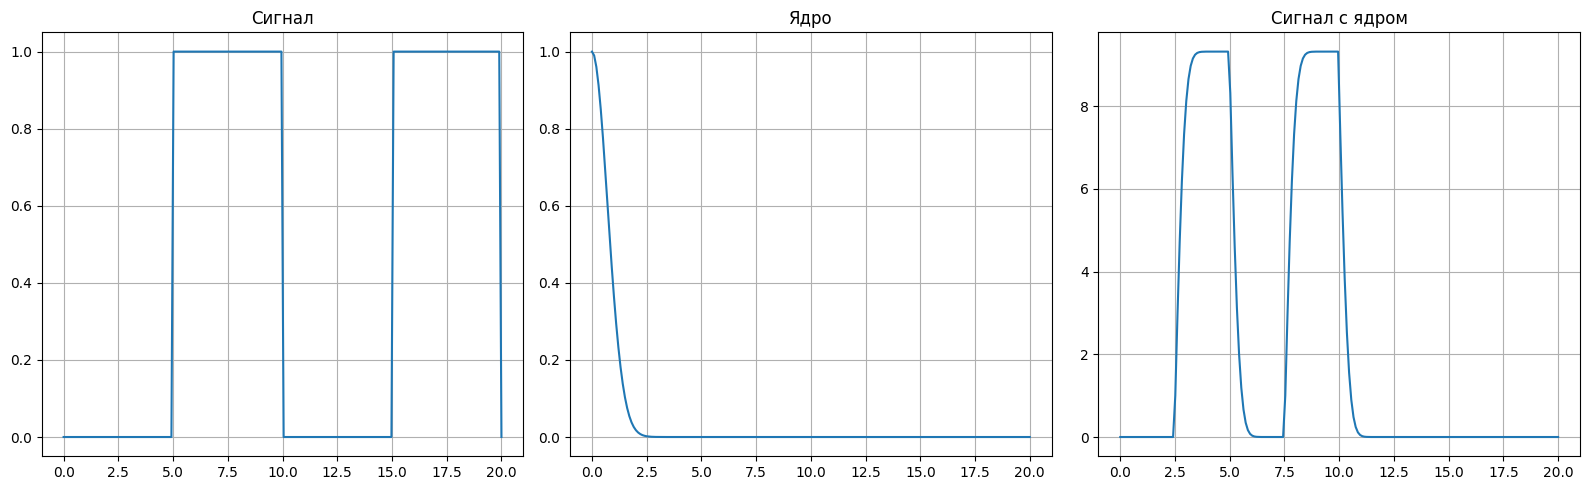

In [ ]:
def my_convolve(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)

    output_length = signal_length + kernel_length - 1

    output = np.zeros(output_length)

    for i in range(output_length):
        start = max(0, i - kernel_length + 1)
        end = min(i + 1, signal_length)
        kernel_start = max(0, kernel_length - 1 - i)
        kernel_end = min(kernel_length, kernel_length - (i - signal_length + 1))

        kernel_slice = kernel[::-1][kernel_start:kernel_end]

        output[i] = np.sum(signal[start:end] * kernel_slice)

    return output


kernel = amplitude * np.exp(-t**2)
signal_with_kernel = my_convolve(signal, kernel)[::2]

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title('Сигнал')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, kernel)
plt.title('Ядро')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t, signal_with_kernel)
plt.title('Сигнал с ядром')
plt.grid(True)
plt.tight_layout()
plt.show()

3) Для любого выбранного Вами ядра свертки убедиться, что свертка во временной
области эквивалентна умножению в частотной области (теорема о свертке).

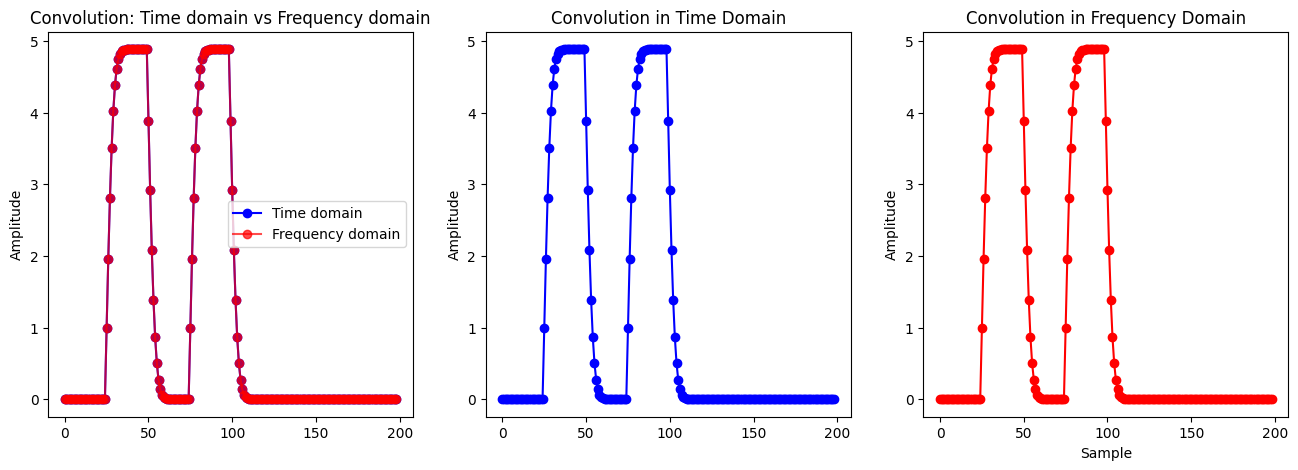

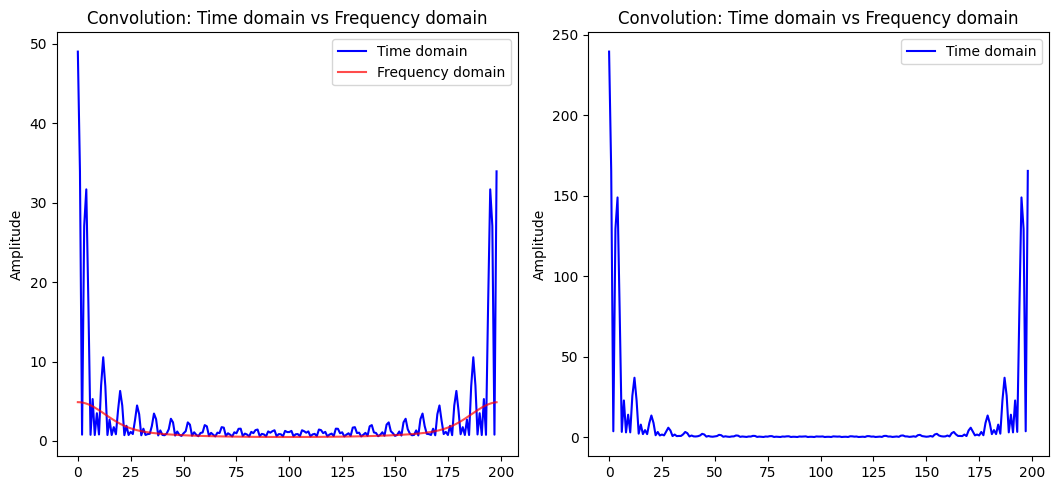

In [ ]:
amplitude = 1
period = 5
duration = 20
sampling_rate = 5

t = np.linspace(0, duration, int(duration * sampling_rate))

signal = np.array([(amplitude if time % (period * 2) >= period else 0) for time in t])
kernel = amplitude * np.exp(-t**2)

convolved_time = np.convolve(signal, kernel, mode='full')

fft_signal = fft(signal, n=len(signal) + len(kernel) - 1)
fft_kernel = fft(kernel, n=len(signal) + len(kernel) - 1)

# Перемножение в частотной области
fft_product = fft_signal * fft_kernel

convolved_freq = ifft(fft_product).real

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(convolved_time, 'o-', label='Time domain', color='blue')
plt.plot(convolved_freq, 'o-', label='Frequency domain', color='red', alpha=0.7)
plt.title('Convolution: Time domain vs Frequency domain')
plt.ylabel('Amplitude')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(convolved_time, 'o-', color='blue')
plt.title('Convolution in Time Domain')
plt.ylabel('Amplitude')


plt.subplot(1, 3, 3)
plt.plot(convolved_freq, 'o-', color='red')
plt.title('Convolution in Frequency Domain')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(np.abs(fft_signal), label='Time domain', color='blue')
plt.plot(np.abs(fft_kernel), label='Frequency domain', color='red', alpha=0.7)
plt.title('Convolution: Time domain vs Frequency domain')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(np.abs(fft_signal * fft_kernel), label='Time domain', color='blue')
plt.title('Convolution: Time domain vs Frequency domain')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

4) Разобраться в реализации свертки с ядром Гаусса для реализации
сглаживающего фильтра во временной области.

5) Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: (а) узкополосной
фильтр (б) фильтр нижних частот

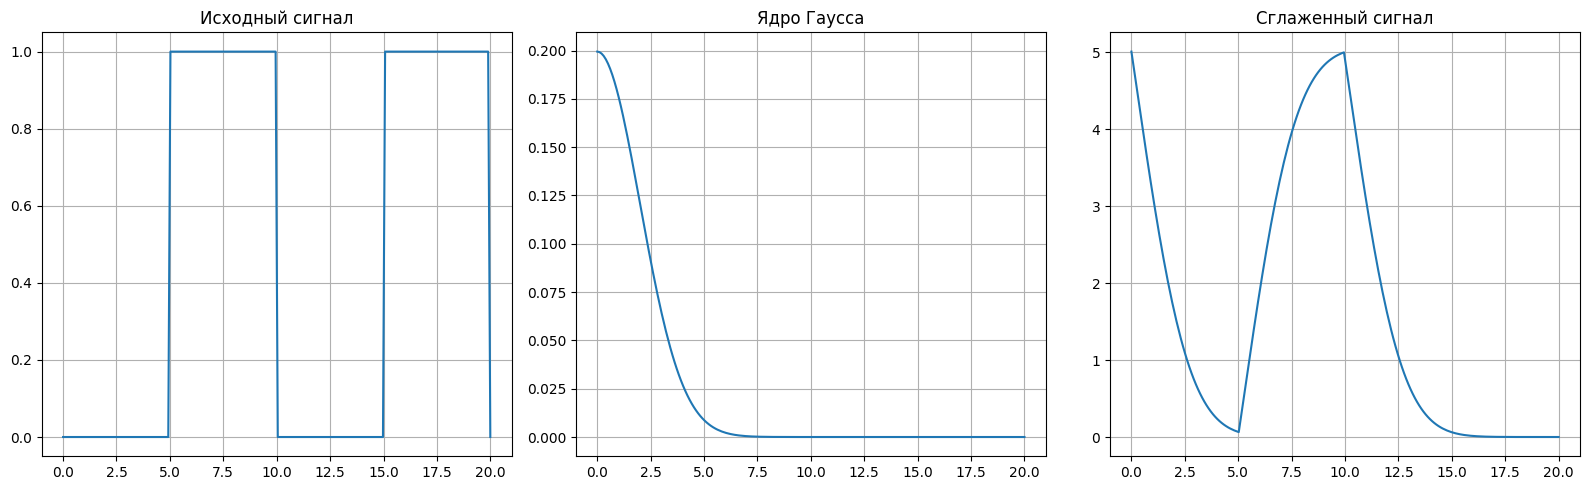

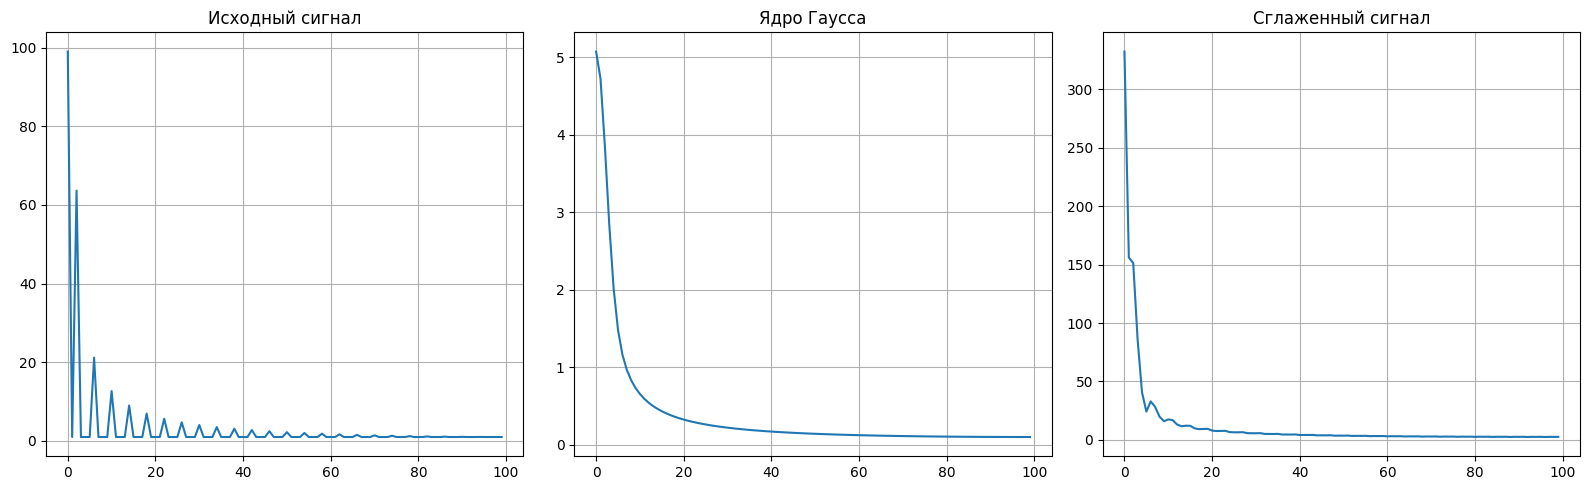

In [ ]:
amplitude = 1
period = 5
duration = 20
sampling_rate = 10

t = np.linspace(0, duration, int(duration * sampling_rate))

signal = np.array([(amplitude if time % (period * 2) >= period else 0) for time in t])

def gaussian_kernel(sigma, t):
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(t**2) / (2 * sigma**2))


sigma = 2
kernel = gaussian_kernel(sigma, t)
convolved_time = np.convolve(signal, kernel, mode='same')

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, kernel)
plt.title('Ядро Гаусса')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(t, convolved_time)
plt.title('Сглаженный сигнал')
plt.grid(True)
plt.tight_layout()
plt.show()

fft_signal = fft(signal)
fft_kernel = fft(kernel)
fft_conv = fft(convolved_time)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(np.abs(fft_signal)[:100])
plt.title('Исходный сигнал')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(np.abs(fft_kernel)[:100])
plt.title('Ядро Гаусса')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(np.abs(fft_conv)[:100])
plt.title('Сглаженный сигнал')
plt.grid(True)
plt.tight_layout()
plt.show()


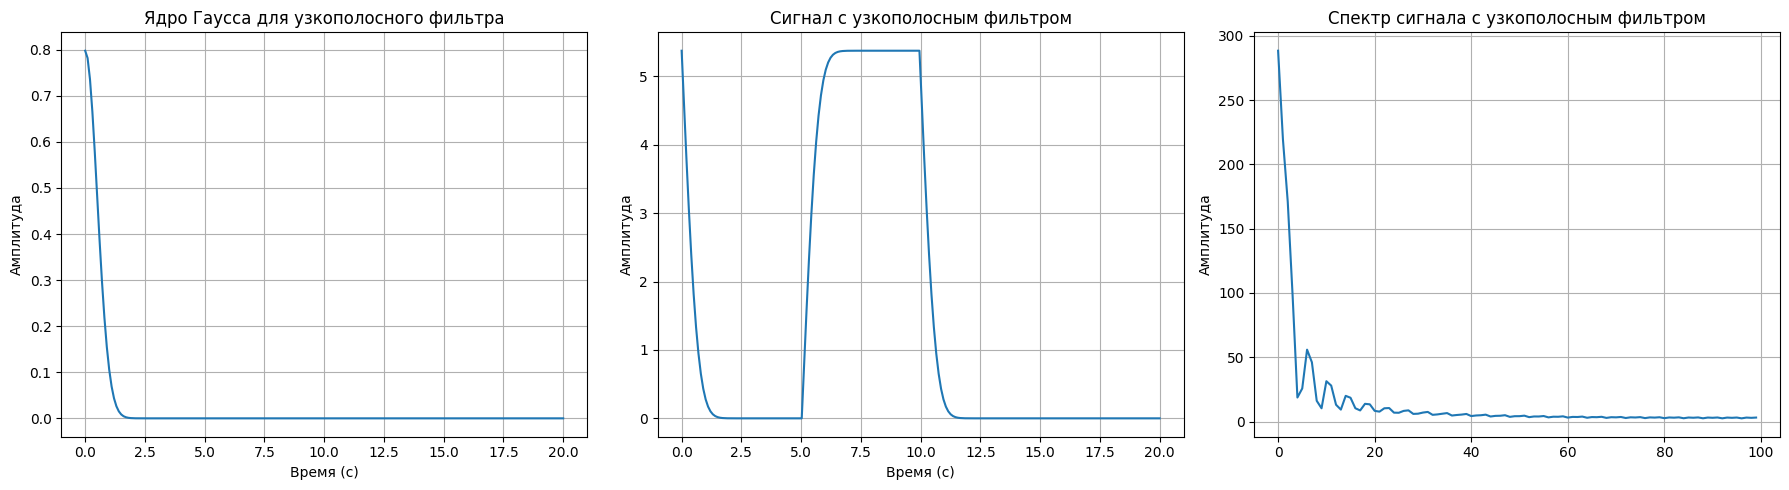

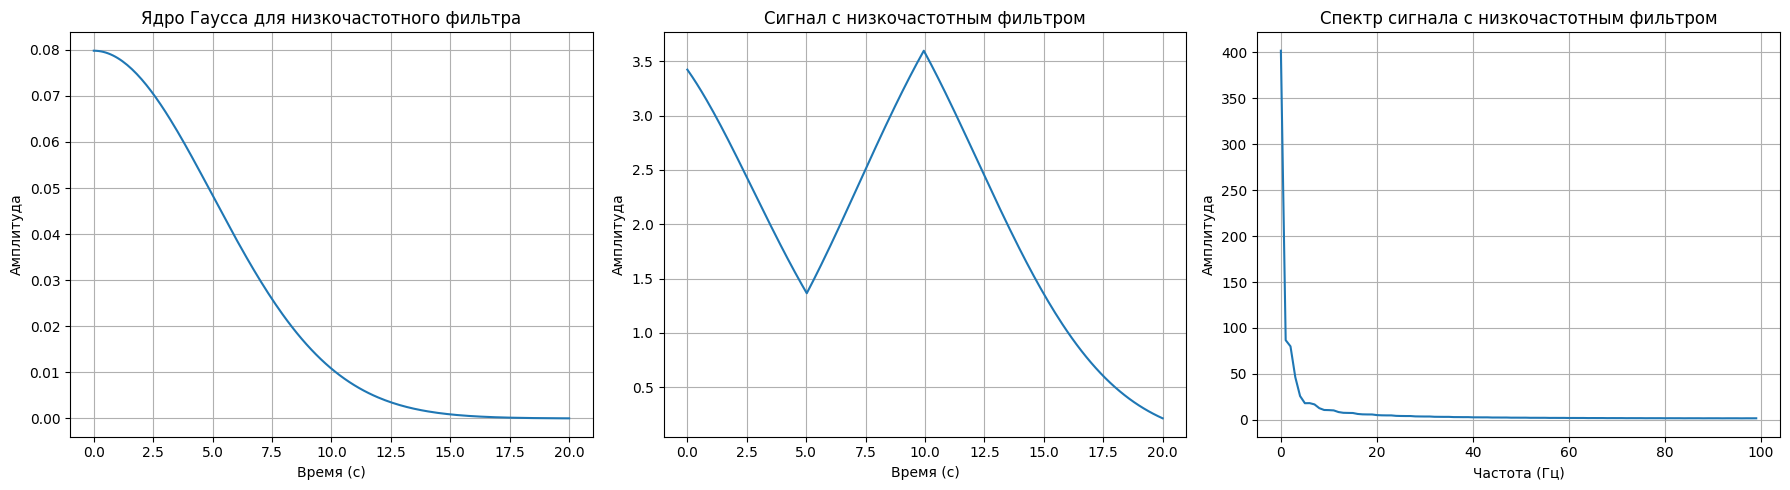

In [ ]:
# 4) Ядро Гаусса для узкополосного фильтра
plt.figure(figsize=(18, 5))
sigma_narrow = 0.5
kernel_narrow = gaussian_kernel(sigma_narrow, t)
plt.subplot(1, 3, 1)
plt.plot(t, kernel_narrow)
plt.title('Ядро Гаусса для узкополосного фильтра')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

convolved_narrow = np.convolve(signal, kernel_narrow, mode='same')
plt.subplot(1, 3, 2)
plt.plot(t, convolved_narrow)
plt.title('Сигнал с узкополосным фильтром')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

fft_narrow = fft(convolved_narrow)
freq = np.fft.fftfreq(len(t), d=1/sampling_rate)
plt.subplot(1, 3, 3)
plt.plot(np.abs(fft_narrow)[:100])
plt.title('Спектр сигнала с узкополосным фильтром')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7) Ядро Гаусса для низкочастотного фильтра
plt.figure(figsize=(18, 5))
sigma_lowpass = 5
kernel_lowpass = gaussian_kernel(sigma_lowpass, t)
plt.subplot(1, 3, 1)
plt.plot(t, kernel_lowpass)
plt.title('Ядро Гаусса для низкочастотного фильтра')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

convolved_lowpass = np.convolve(signal, kernel_lowpass, mode='same')
plt.subplot(1, 3, 2)
plt.plot(t, convolved_lowpass)
plt.title('Сигнал с низкочастотным фильтром')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

fft_lowpass = fft(convolved_lowpass)
plt.subplot(1, 3, 3)
plt.plot(np.abs(fft_lowpass)[:100])
plt.title('Спектр сигнала с низкочастотным фильтром')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.tight_layout()
plt.show()

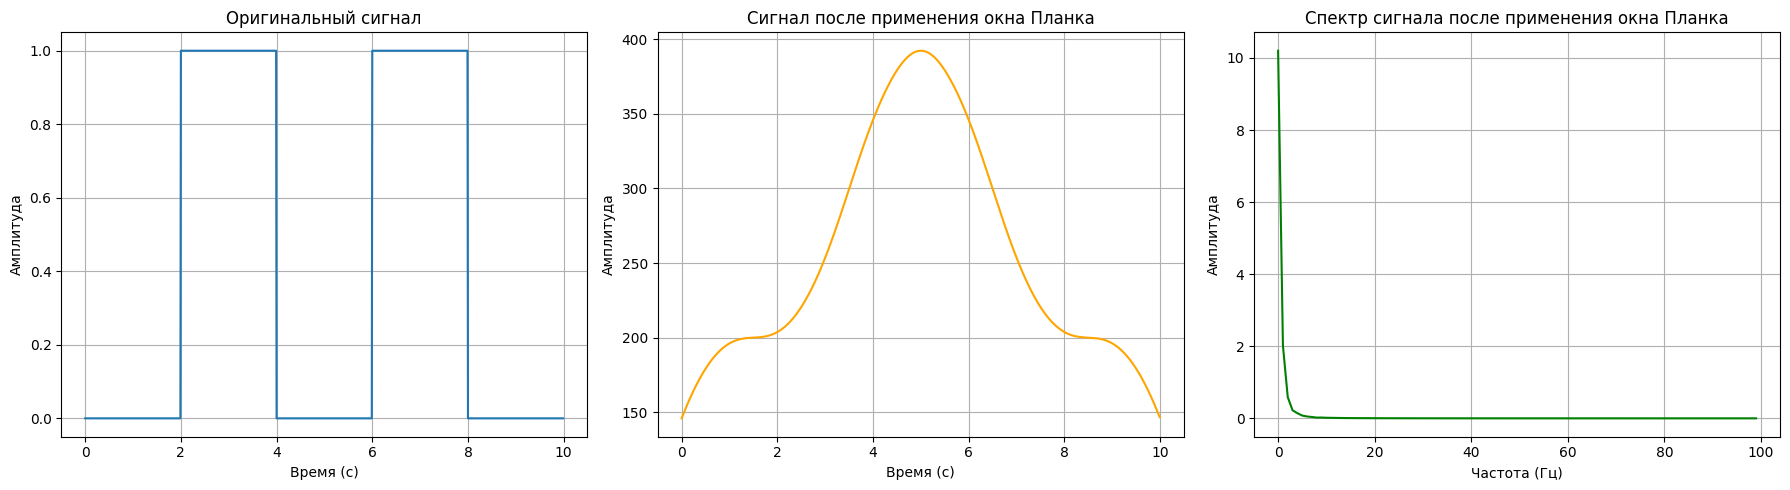

In [ ]:
def planck_taper(N, epsilon):
    a = np.zeros(N)
    for k in range(N):
        if k == 0 or k == N - 1:
            a[k] = 0
        elif 0 < k < epsilon * (N - 1):
            z_a = epsilon * (N - 1) * (1 / k + 1 / (k - epsilon * (N - 1)))
            a[k] = 1 / (np.exp(z_a) + 1)
        elif epsilon * (N - 1) <= k <= (1 - epsilon) * (N - 1):
            a[k] = 1
        elif (1 - epsilon) * (N - 1) < k < N - 1:
            z_b = epsilon * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - epsilon) * (N - 1) - k))
            a[k] = 1 / (np.exp(z_b) + 1)
    return a

duration = 10
sampling_rate = 100
t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
signal_length = len(t)

amplitude = 1.0
period = 2.0

signal = np.array([(amplitude if time % (period * 2) >= period else 0) for time in t])

epsilon = 0.3

plank_window_custom = planck_taper(signal_length, epsilon)

windowed_signal = np.convolve(signal, plank_window_custom, mode='same')

spectrum = fft(windowed_signal)
freqs = fftfreq(len(signal), 1 / sampling_rate)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(t, signal, label='Оригинальный сигнал')
plt.title('Оригинальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, windowed_signal, label='Сигнал после применения окна Планка', color='orange')
plt.title('Сигнал после применения окна Планка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot((np.abs(spectrum)/25000)[:100], label='Спектр сигнала', color='green')
plt.title('Спектр сигнала после применения окна Планка')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)


plt.tight_layout()
plt.show()

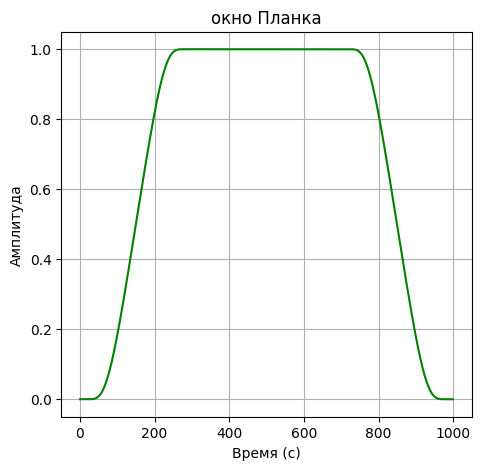

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(plank_window_custom, label='Сигнал после применения окна Планка', color='green')
plt.title('окно Планка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

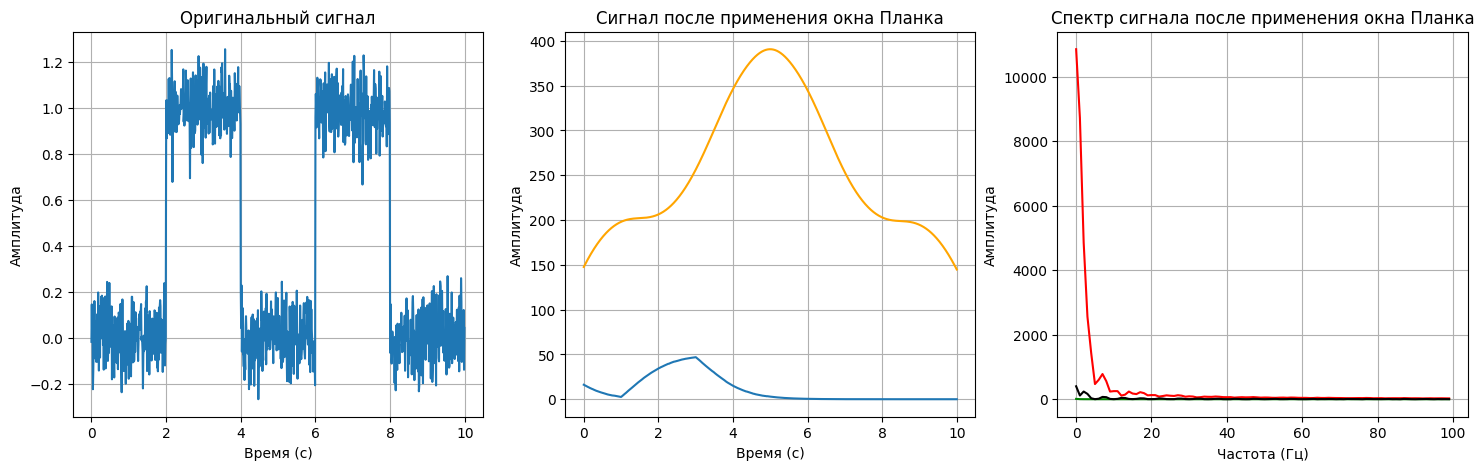

In [ ]:
y = signal
signal = np.array([(amplitude if time % (period * 2) >= period else 0) for time in t]) + np.random.normal(size=y.shape) / 10
sigma = 1
kernel = gaussian_kernel(sigma, t)
convolved_time = np.convolve(signal, kernel, mode='same')
windowed_signal = np.convolve(signal, plank_window_custom, mode="same")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(t, signal, label='Оригинальный сигнал')
plt.title('Оригинальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t, windowed_signal, label='Сигнал после применения окна Планка', color='orange')
plt.plot(t, convolved_time, label = "Сигнал после применения ядра Гаусса")
plt.title('Сигнал после применения окна Планка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(np.abs((fft(windowed_signal))/25000)[:100], label='Спектр сигнала с планком', color='green')
plt.plot(np.abs(fft(convolved_time))[:100], label='Спектр сигнала с гауссом', color='red')
plt.plot(np.abs(fft(signal))[:100], label='Спектр сигнала', color='black')
plt.title('Спектр сигнала после применения окна Планка')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.show()

